# CH03 2차원 데이터 정리

## 두 데이터 사이의 관계를 나타내는 지표 


In [19]:
# 데이터 준비 

import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [20]:
df = pd.read_csv('scores_em.csv', index_col= 'student number')

In [21]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores},
                         index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 3.1.1 공분산

##### 공분산 : 두 데이터의 상관관계를 나타내는 지표
##### 상관계수 : 단위에 의존하지 않는 상관을 나타내는 지표
* 상관계수는 공분산을 각 데이터의 표준편차로 나눈 값
* 상관계수 r은 -1부터 1까지의 값을 가짐
* 1 : 두 데이터가 강력한 양의 상관관계가 있음
* 0 : 두 데이터가 서로 관계가 없음
* -1 : 두 데이터가 강력한 음의 상관관계가 있음

In [22]:
# 공분산
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation']=\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [23]:
summary_df['product of deviations'].mean()

62.800

* 공분산이 62.8이므로 영어점수와 수학점수는 양의 상관관계가 있다고 할 수 있음

In [24]:
# numPy의 경우, 공분산을 cov()로 구할 수 있음
# return 값이 공분산값이 아닌 공분산행렬(분산공분산 행렬)임

cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [25]:
# civ_mat의 [0,1], [1,0] 성분이 공분산
# [0.0]. [1,1] 성분은 각각 영어와 영어의 공분산 = 영어의 분산 / 수학과 수학의 공분산 = 수학의 분산

cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [26]:
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [27]:
# 영어와 수학의 분산 구하기
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

#### 상관계수

In [28]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/(np.std(en_scores) * np.std(ma_scores))

0.819

In [29]:
# 상관계수를 corrcoef()로 계산 가능

np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

상관행렬의 [0,1]과 [1,0] 성분이 영어와 수학의 상관계수

[0,0], [1,1] 성분은 각각 영어와 영어의 상관계수, 수학과 수학의 상관계수에 대응

In [30]:
# DataFrame에서의 corr() 메서드 이용해서 상관계수 출력
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 3.2 2차원 데이터의 시각화

### 3.2.1 산점도

In [31]:
# scatter() 메서드를 이용해서 산점도 그리기

import matplotlib.pyplot as plt

%matplotlib inline


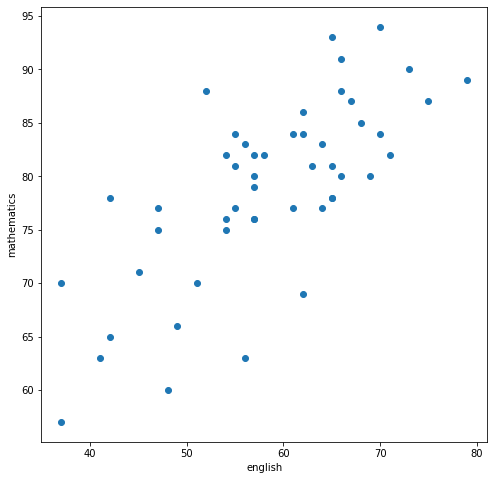

In [35]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

#산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 3.2.2 회귀 직선


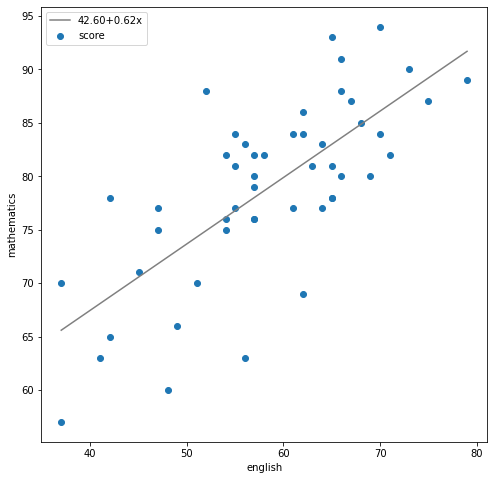

In [37]:
# 계수 b(베타)_0, b_1을 구함
poly_fit = np.polyfit(english_scores, math_scores,1)

# b_0 + b_1x를 return하는 함수 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x좌표 생성
xs = np.linspace(enlish_scores.min(), english_scores.max())

# xs에 대응하는 y좌표 구하기
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 범례표시
ax.legend(loc = 'upper left')

plt.show()

### 3.2.3 히트맵



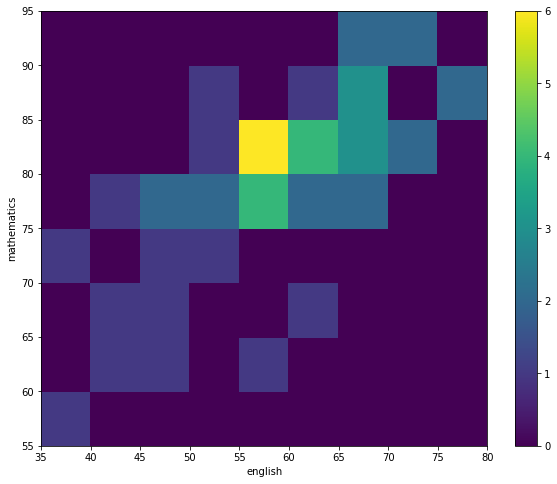

In [41]:
fig=plt.figure(figsize = (10,8))
ax =fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range = [(35,80), (55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()